## Load in Shear Catalog

In [1]:
from SMPy.KaiserSquires import utils

In [2]:
path = '/home/wslgeorgios/SMPy/notebooks/forecast_lum_annular.fits'
shear_df = utils.load_shear_data(path, 'ra', 'dec', 'g1_Rinv', 'g2_Rinv', 'weight')
shear_df

,ra,dec,g1,g2,weight
0,199.436121,32.975130,-0.832185,-0.329239,3.289114
1,199.649709,32.975024,-0.045790,-0.618257,3.676469
2,199.382810,32.975117,0.708573,0.527764,3.639724
3,199.383113,32.974996,0.523717,0.502735,3.586006
4,199.547529,32.975129,-0.085572,-0.037222,3.682295
...,...,...,...,...,...
8762,199.344100,33.148682,-0.179205,-0.475623,3.776079
8763,199.637278,33.147841,-0.716973,-0.286508,3.688194
8764,199.638768,33.147945,-0.006985,0.281479,3.631956
8765,199.479418,33.147894,0.268532,0.154718,3.788313


## Convert DataFrame to Spacial Representation

In [3]:
import numpy as np
import pandas as pd

### Compute the boundaries of the field

In [4]:
resolution = 0.141  # Resolution in arcminutes
width = 220  # Width in pixels
boundaries = utils.calculate_field_boundaries(shear_df, resolution, width)
print(boundaries)

{'ra_min': 199.24285657428126, 'ra_max': 199.75985657428126, 'dec_min': 32.84261107631841, 'dec_max': 33.35961107631841}


### Spatial binning

In [5]:
g1map, g2map = utils.create_shear_grid(shear_df['ra'], 
                                 shear_df['dec'], 
                                 shear_df['g1'],
                                 shear_df['g2'], 
                                 shear_df['weight'],
                                 boundaries=boundaries,
                                 npix=width,
                                 )

[ 81 172  59 ... 167 100 186] [ 56  56  56 ... 129 129 129]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


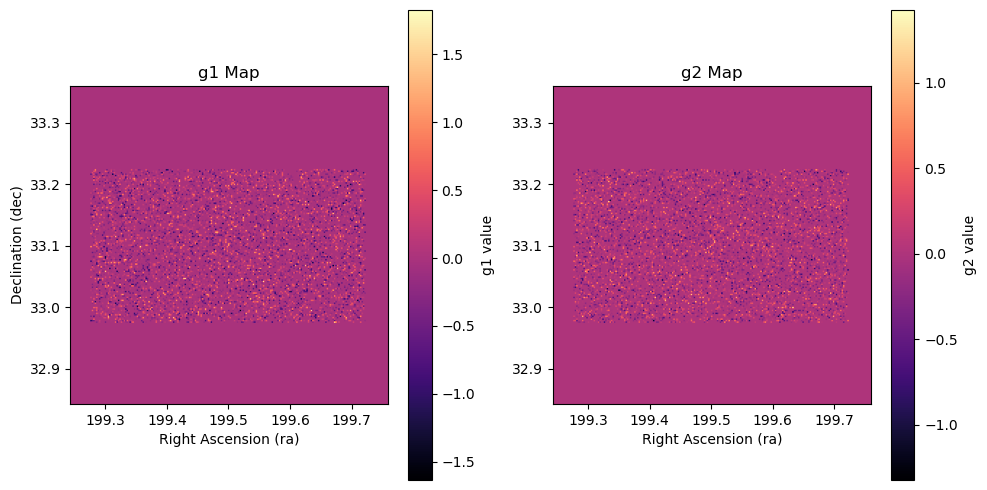

In [6]:
from matplotlib import pyplot as plt

# Calculate median RA and Dec
med_ra = np.median(shear_df['ra'])
med_dec = np.median(shear_df['dec'])

# Extract the boundaries from the dictionary
boundaries_list = [boundaries['ra_min'], boundaries['ra_max'], boundaries['dec_min'], boundaries['dec_max']]

# Plotting g1 map
plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(g1map, cmap='magma', origin='lower', extent=boundaries_list)
plt.colorbar(label='g1 value')  # Optional: Add a colorbar
plt.scatter(med_ra, med_dec, marker='none', color='white')  # Mark the median RA and Dec
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.title('g1 Map')

# Plotting g2 map
plt.subplot(122)
plt.imshow(g2map, cmap='magma', origin='lower', extent=boundaries_list)
plt.colorbar(label='g2 value')  # Optional: Add a colorbar
plt.scatter(med_ra, med_dec, marker='none', color='white')  # Mark the median RA and Dec
plt.xlabel('Right Ascension (ra)')
plt.title('g2 Map')

plt.tight_layout()  # Adjust layout for better presentation
plt.show()
